# Practica 1: Adquisición e introducción a los Espacios de Color

Bienvenidos al primer taller en clase de Visión Artificial.

En este módulo se busca resaltar la capacidad y creatividad del estudiante para adquiririr y pre-procesar la información contenida en una imagen.

Existen algunas reglas que deben tenerse en cuenta en el proceso de adquisición.

## 1. La información que no esté contenida en la imagen, no puede analizarse.

Esto, en esencia, significa que aquello que no pueda captarse con el sensor, es imposible de procesar con técnicas de Visión Artificial tradicional.

## 2. Una buena adquisición, soluciona muchos problemas de procesamiento.

Efectivamente, un correcto proceso de adquisición puede ahorrar pasos significativos en el procesamiento digital de imágenes, factores como la iluminación pueden afectar la separación por espacios de color del objeto estudio. Por tanto, un buen sensor y la creatividad son un factor fundamental.

## 3. Las imágenes no siempre son lo que esperamos.

No en todos los problemas de Visión Artificial podremos adquirir imágenes, claramente, muchos problemas en el medio ya tienen datos asociados (e.g un dataset con 10000 imágenes de melanomas), sin embargo,  en el caso particular, usted podrá disponer de todas las imágenes que desee, facilitando (o dificultando) el proceso de separación de la información útil.

## 4. La adquisición no solamente es tomar una o varias fotografías.

En muchos problemas de Visión Artificial en el medio, el proceso de adquisición también compende un conjunto de habilidades sociales para reconocer cuál es el verdadero problema que se busca atacar, recordemos que el análisis digital de imágenes es ampliamente utilizado para automatización de procesos, donde, claramente muchos individuos clasifican y distinguen muestras consideradas "buenas" de "malas" con su experiencia personal, cuestiones que, no pueden traducirse fácilmente al mundo digital.

<img src = "res/taking.jpg" width = 400x>

## Módulo de Adquisición.

### Todas las imágenes deben guardarse en la carpeta "res".

<br><b> Materiales: </b></br>
<br> Una cámara (celular, profesional, semiprofesional, etc.) </br>
<br> Elementos de estudio.</br>
<br> Una linterna o una fuente de iluminación diferente al flash o la lámpara del aula de trabajo. </br>
<br> Una caja de cartón, bisturí o tijeras </br>

In [1]:
###Espacio para importar las librerías###

#Magic para mostrar imágenes en Jupyter usando matplotlib
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

## Actividad 1.

Realice un proceso de adquisición de la imagen, utilizando como objetivo el/los objetos disponibles. 
<br> Recuerde que un factor fundamental en la toma de imágenes y su posterior estudio, es el manejo de la luz en la misma. Por lo tanto, debe tomar fotografías bajo las siguientes premisas: </br>

<br><b>1.</b></br> El objeto bajo la iluminación del aula, el ambiente "natural", <b>con</b> y <b>sin</b> flash.
<br><b>2.</b></br> El objeto a contraluz, utilizando como fuente la iluminación del aula.
<br><b>3.</b></br> Iluminar el objeto con la fuente de iluminación externa (puede ser la linterna de otro celular), desde distintos ángulos. Realice el proceso de adquisición <b>con</b> y <b>sin</b> flash. Intente una toma a contraluz, pero esta vez la fuente de iluminación es la externa.
<br><b>4.</b></br> Sin una fuente de iluminación, lo más oscuro posible, <b>con</b> y <b>sin</b> flash.
<br><b>5.</b></br> Realice el montaje con la caja de cartón indicado en clase.
<br><b>6.</b></br> Intente segmentar la región reto del objeto específico.

Utilice OpenCv y matplotlib para leer y mostrar las imágenes respectivamente, en el espacio de color RGB.

<b> Recuerde que OpenCv lee las imágenes en BGR, por tanto debe convertirlas a RGB </b>

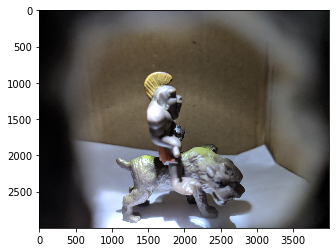

In [3]:
img = cv2.imread("res/costado-ilum-arriba-noflash.jpg", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Actividad 2.

Separe y muestre las imágenes en los canales R,G,B del espacio de color RGB. Realice el mismo proceso para el espacio de color LAB, mostrando los canales L,A y B* respectivamente. ¿En qué canal se observa más fácilmente el objeto de estudio? ¿Depende esto de la fotografía que se estudie? Justifique.

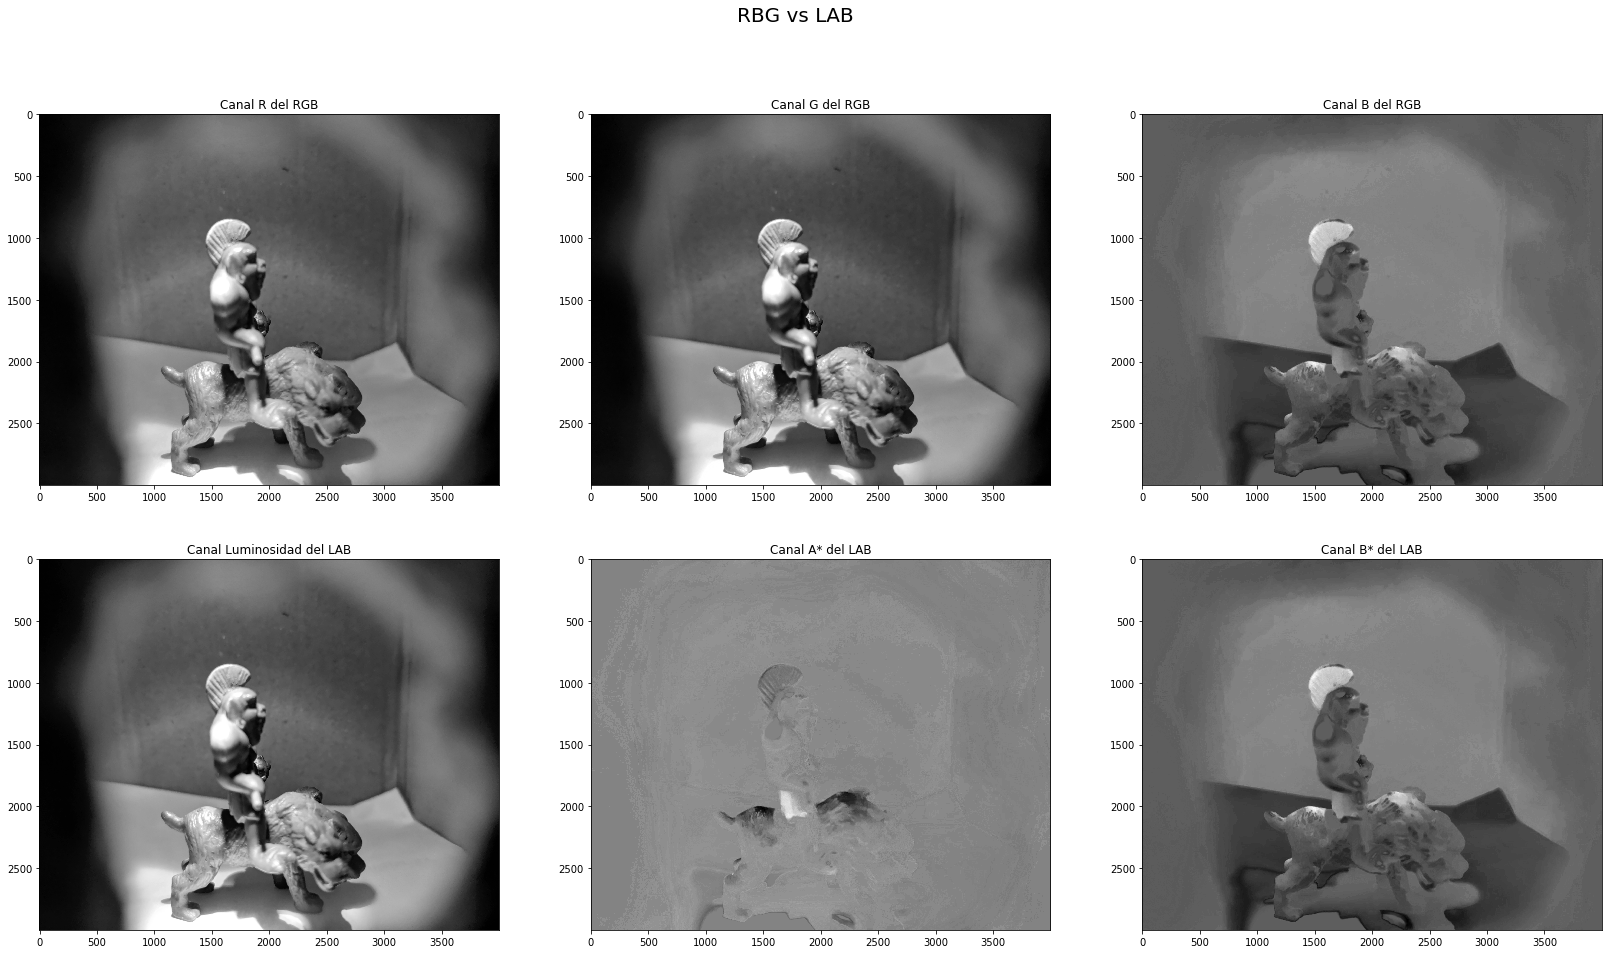

In [5]:
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]
#Canal RGB vs LAB
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='gray', aspect='auto')
ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(img_L, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(img_A, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(img_B, cmap='gray', aspect='auto')

Nuestro Objeto de estudio es la cresta del personaje de la foto.

- ¿En qué canal se observa más fácilmente el objeto de estudio?

R/: El objeto de estudio se observa más fácil en el canal B del LAB

- ¿Depende esto de la fotografía que se estudie?

R/: Si, por que el proceso de adquisición también comprende un conjunto de habilidades para reconocer cuál es el verdadero problema que se busca atacar, en este caso se deseó identificar la cresta de personaje de la foto y para esto se elige la foto donde mejor se represente dicho objeto de trabajo.

## Actividad 3.

Una vez escogida la imagen donde mejor se puede apreciar el objeto, en el canal del espacio de color respectivo, ¿Puede separar usted el objeto del fondo?
<br> Genere una segmentación de tipo binario y analice. </br>

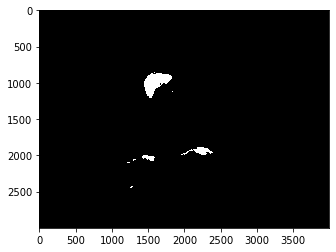

In [6]:
ret,thresh2 = cv2.threshold(img_B,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='gray')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\morphology\misc.py:211: UserWarning: the min_size argument is deprecated and will be removed in 0.16. Use area_threshold instead.
  warn("the min_size argument is deprecated and will be removed in " +


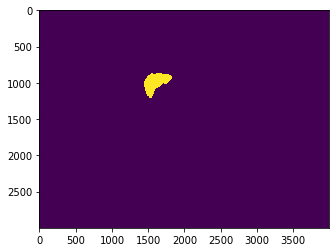

In [7]:
from skimage import morphology as morph

#selem = morph.rectangle(100,100)
#res = morph.closing(thresh2, selem)
#plt.imshow(res)
thresh2 = thresh2/255
res = morph.remove_small_holes(thresh2.astype(bool), min_size = 1000000)
res = morph.remove_small_objects(res, min_size = 30000)
plt.imshow(res)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


Numero de etiquetas detectadas: 1


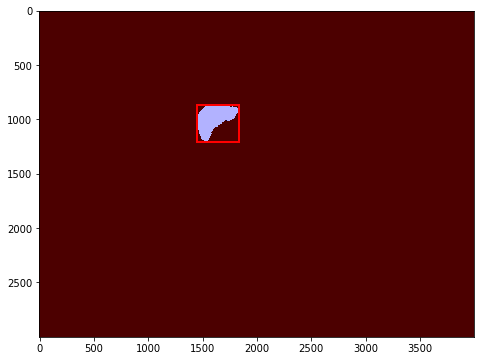

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = res

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
i = 0
for region in regionprops(label_image):
    i += 1
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle 
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

#ax.set_axis_off()
#plt.tight_layout()
print('Numero de etiquetas detectadas: ' + str(i))
#plt.show();

Finalmente se modifican las dimensiones de los segmentos seleccionados y se realiza una segmentación binaria, con el fin de llevar la foto a tonos de blanco y negro e identificar el objeto real "Cresta del personaje" el cual se encierra con un recuadro rojo en la imagen anterior. Efectivamente se logra hacer la identificación de la cresta del personaje y separarla del fondo original de la imagen.

Las características del sensor con el cual se realizó la adquisición de las imágenes son las siguientes:

48 MP, f/1.75